In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
match =  pd.read_csv("data/all_matches.csv",low_memory = False)
test = pd.read_csv("data/test_data.csv",low_memory = False)

In [5]:
test

,venue,batting_team,bowling_team,over,target,runs_left,balls_left,wickets_left,crr,rrr,result
0,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,8,231,159,72,7,9.000000,13.250000,0
1,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,2,231,228,108,8,1.500000,12.666667,0
2,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,20,231,45,5,2,9.704348,54.000000,0
3,"Himachal Pradesh Cricket Association Stadium, ...",Punjab Kings,Royal Challengers Bangalore,13,241,103,47,5,11.342466,13.148936,0
4,"Himachal Pradesh Cricket Association Stadium, ...",Punjab Kings,Royal Challengers Bangalore,10,241,130,64,7,11.892857,12.187500,0
5,"Himachal Pradesh Cricket Association Stadium, ...",Punjab Kings,Royal Challengers Bangalore,1,241,227,114,9,14.000000,11.947368,0
6,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,1,165,157,114,10,8.000000,8.263158,1
7,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,4,165,101,96,10,16.000000,6.312500,1
8,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,6,165,58,84,10,17.833333,4.142857,1
9,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,9,165,8,66,10,17.444444,0.727273,1


In [6]:
match.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250903 entries, 0 to 250902
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                250903 non-null  int64  
 1   season                  250903 non-null  object 
 2   start_date              250903 non-null  object 
 3   venue                   250903 non-null  object 
 4   innings                 250903 non-null  int64  
 5   ball                    250903 non-null  float64
 6   batting_team            250903 non-null  object 
 7   bowling_team            250903 non-null  object 
 8   striker                 250903 non-null  object 
 9   non_striker             250903 non-null  object 
 10  bowler                  250903 non-null  object 
 11  runs_off_bat            250903 non-null  int64  
 12  extras                  250903 non-null  int64  
 13  wides                   7939 non-null    float64
 14  noballs             

In [8]:
match['runs'] = match['runs_off_bat'] + match['extras']

In [9]:
match.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
total_score_df = match.groupby(['match_id','innings']).sum()['runs'].reset_index()
second_inning = total_score_df[total_score_df['innings'] == 2]
total_score_df = total_score_df[total_score_df['innings'] == 1]
total_score_df = second_inning.merge(total_score_df[['match_id','runs']],left_on='match_id',right_on='match_id')

In [11]:
# balls_df = match.groupby(['match_id','innings']).count()['ball'].reset_index()
# balls_df = balls_df[balls_df['innings'] == 2]

In [12]:
total_score_df

,match_id,innings,runs_x,runs_y
0,335982,2,82,222
1,335983,2,207,240
2,335984,2,132,129
3,335985,2,166,165
4,335986,2,112,110
...,...,...,...,...
1045,1426263,2,199,196
1046,1426264,2,170,167
1047,1426265,2,152,147
1048,1426266,2,162,161


In [13]:
# balls_df

In [14]:
total_score_df.rename({'runs_x': 'sec_inning_score', 'runs_y': 'runs'}, axis=1, inplace=True)
# balls_df.rename({'ball_x':'sec_inning_ball'})

In [15]:
match_df = match.merge(total_score_df[['match_id','runs','sec_inning_score']],left_on='match_id',right_on='match_id')
match_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,222,82
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.4,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,206,186
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,206,186


In [16]:
match_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [17]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans',
    'Punjab Kings',
    'Lucknow Super Giants'
]

In [18]:
match_df['batting_team'] = match_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['bowling_team'] = match_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['batting_team'] = match_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['bowling_team'] = match_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['batting_team'] = match_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['bowling_team'] = match_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

match_df['batting_team'] = match_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['bowling_team'] = match_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

In [19]:
match_df = match_df[match_df['batting_team'].isin(teams)]
match_df = match_df[match_df['bowling_team'].isin(teams)]

In [20]:
match_df.shape

(228344, 25)

In [21]:
match_df = match_df[match_df['innings'] == 2]

In [22]:
match_df.shape

(110274, 25)

In [23]:
match_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,0.5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.4,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,206,186
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,19.6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,206,186


In [24]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110274 entries, 124 to 250593
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                110274 non-null  int64  
 1   season                  110274 non-null  object 
 2   start_date              110274 non-null  object 
 3   venue                   110274 non-null  object 
 4   innings                 110274 non-null  int64  
 5   ball                    110274 non-null  float64
 6   batting_team            110274 non-null  object 
 7   bowling_team            110274 non-null  object 
 8   striker                 110274 non-null  object 
 9   non_striker             110274 non-null  object 
 10  bowler                  110274 non-null  object 
 11  runs_off_bat            110274 non-null  int64  
 12  extras                  110274 non-null  int64  
 13  wides                   3550 non-null    float64
 14  noballs           

In [25]:
import math
match_df['over'] = np.floor(match_df['ball']).astype(np.int64)
match_df['ball'] = ((match_df['ball']%1)*10).astype(np.int64)

In [26]:
match_df 

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score,over
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82,0
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186,19
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186,19
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,206,186,19
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,206,186,19


In [27]:
match_df['current_score'] = match_df.groupby('match_id').cumsum()['runs_x']    
match_df['runs_left'] = np.where((match_df['current_score'] < match_df['runs_y']), match_df['runs_y'] - match_df['current_score'], 0)

# delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
match_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score,over,current_score,runs_left
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,1,221
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,2,220
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82,0,2,220
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,3,219
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186,19,178,28
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186,19,182,24
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,206,186,19,184,22
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,206,186,19,185,21


In [ ]:
match_df['balls_left'] = np.where((match_df['ball'] <= 6), ((19 - match_df['over'])*6)+(6-match_df['ball']), 19 - match_df['over'] )



In [ ]:
match_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score,over,current_score,runs_left,balls_left
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,1,221,119
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,2,220,118
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,222,82,0,2,220,117
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,3,219,116
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222,82,0,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186,19,178,28,3
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,206,186,19,182,24,3
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,206,186,19,184,22,1
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,206,186,19,185,21,0


In [ ]:
match_df['player_dismissed'] = match_df['player_dismissed'].fillna("0")
match_df['player_dismissed'] = match_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
match_df['player_dismissed'] = match_df['player_dismissed'].astype('int')
wickets = match_df.groupby('match_id').cumsum()['player_dismissed'].values
match_df['wickets_left'] = 10 - wickets
match_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score,over,current_score,runs_left,balls_left,wickets_left
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,1,221,119,10
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,1,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,2,220,118,10
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,222,82,0,2,220,117,10
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,3,219,116,10
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,4,218,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,206,186,19,178,28,3,4
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,206,186,19,182,24,3,4
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,206,186,19,184,22,1,4
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,206,186,19,185,21,0,4


In [ ]:
match_df['crr'] = (match_df['current_score']*6)/(120 - match_df['balls_left']).round(3)
match_df['rrr'] = np.where((match_df['balls_left'] == 0), (match_df['runs_left']*6), (match_df['runs_left']*6)/match_df['balls_left'])


In [ ]:
match_df['result'] = (match_df['sec_inning_score']>match_df['runs_y']).astype(np.int64)

In [ ]:
match_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,runs_x,runs_y,sec_inning_score,over,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,1,221,119,10,6.000000,11.142857,0
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,1,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,2,220,118,10,6.000000,11.186441,0
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,3,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,222,82,0,2,220,117,10,4.000000,11.282051,0
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,4,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,3,219,116,10,4.500000,11.327586,0
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,5,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,222,82,0,4,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,206,186,19,178,28,3,4,9.128205,56.000000,0
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,3,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,206,186,19,182,24,3,4,9.333333,48.000000,0
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,5,Mumbai Indians,Chennai Super Kings,RG Sharma,Mohammad Nabi,M Pathirana,0,2,2.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2,206,186,19,184,22,1,4,9.277311,132.000000,0
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",2,6,Mumbai Indians,Chennai Super Kings,Mohammad Nabi,RG Sharma,M Pathirana,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,206,186,19,185,21,0,4,9.250000,126.000000,0


In [ ]:
match_df= match_df.fillna("0")
match_df['wides'] = match_df['wides'].astype('int')
match_df['byes'] = match_df['byes'].astype('int')
match_df['legbyes'] = match_df['legbyes'].astype('int')
match_df['penalty'] = match_df['penalty'].astype('int')
match_df['wides'] = match_df['wides'].astype('int')
match_df['rrr'] = match_df['rrr'].astype('float64')
match_df['noballs'] = match_df['noballs'].astype('int')


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110274 entries, 124 to 250593
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                110274 non-null  int64  
 1   season                  110274 non-null  object 
 2   start_date              110274 non-null  object 
 3   venue                   110274 non-null  object 
 4   innings                 110274 non-null  int64  
 5   ball                    110274 non-null  int64  
 6   batting_team            110274 non-null  object 
 7   bowling_team            110274 non-null  object 
 8   striker                 110274 non-null  object 
 9   non_striker             110274 non-null  object 
 10  bowler                  110274 non-null  object 
 11  runs_off_bat            110274 non-null  int64  
 12  extras                  110274 non-null  int64  
 13  wides                   110274 non-null  int32  
 14  noballs           

In [ ]:
final_df = match_df[['match_id' , 'season' , 'start_date' , 'venue' ,'batting_team' , 'bowling_team' ,'over' , 'ball' , 'striker', 'non_striker' , 'bowler', 'runs_y', 'current_score' , 'runs_left' , 'balls_left',  'wickets_left' , 'crr', 'rrr', 'result' ]]

In [ ]:
final_df

,match_id,season,start_date,venue,batting_team,bowling_team,over,ball,striker,non_striker,bowler,runs_y,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,W Jaffer,AB Dinda,222,1,221,119,10,6.000000,11.142857,0
125,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,R Dravid,AB Dinda,222,2,220,118,10,6.000000,11.186441,0
126,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,R Dravid,AB Dinda,222,2,220,117,10,4.000000,11.282051,0
127,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,R Dravid,AB Dinda,222,3,219,116,10,4.500000,11.327586,0
128,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,W Jaffer,AB Dinda,222,4,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,3,RG Sharma,Mohammad Nabi,M Pathirana,206,178,28,3,4,9.128205,56.000000,0
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,3,RG Sharma,Mohammad Nabi,M Pathirana,206,182,24,3,4,9.333333,48.000000,0
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,5,RG Sharma,Mohammad Nabi,M Pathirana,206,184,22,1,4,9.277311,132.000000,0
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,6,Mohammad Nabi,RG Sharma,M Pathirana,206,185,21,0,4,9.250000,126.000000,0


In [ ]:
final_df

NameError: name 'final_df' is not defined

In [ ]:
final_df.rename({'runs_y': 'target'}, axis=1, inplace=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110274 entries, 124 to 250593
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       110274 non-null  int64  
 1   season         110274 non-null  object 
 2   start_date     110274 non-null  object 
 3   venue          110274 non-null  object 
 4   batting_team   110274 non-null  object 
 5   bowling_team   110274 non-null  object 
 6   over           110274 non-null  int64  
 7   ball           110274 non-null  int64  
 8   striker        110274 non-null  object 
 9   non_striker    110274 non-null  object 
 10  bowler         110274 non-null  object 
 11  target         110274 non-null  int64  
 12  current_score  110274 non-null  int64  
 13  runs_left      110274 non-null  int64  
 14  balls_left     110274 non-null  int64  
 15  wickets_left   110274 non-null  int32  
 16  crr            110274 non-null  float64
 17  rrr            110274 non-n

In [ ]:
final_df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
      

In [ ]:
teams = [
    'M Chinnaswamy Stadium, Bengaluru',
    'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Eden Gardens, Kolkata',
    'Wankhede Stadium, Mumbai',
    'Sawai Mansingh Stadium, Jaipur',
    'Rajiv Gandhi International Stadium, Uppal',
    'MA Chidambaram Stadium, Chepauk',
    'Dr DY Patil Sports Academy, Mumbai',
    'Newlands',
    "St George's Park",
    'Kingsmead',
    'SuperSport Park',
    'Buffalo Park',
    'New Wanderers Stadium',
    'De Beers Diamond Oval',
    'OUTsurance Oval', 
    'Brabourne Stadium, Mumbai',
    'Barabati Stadium',
    'Vidarbha Cricket Association Stadium, Jamtha',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Subrata Roy Sahara Stadium',
    'Shaheed Veer Narayan Singh International Stadium',
    'JSCA International Stadium Complex', 
    'Zayed Cricket Stadium, Abu Dhabi',
    'Sharjah Cricket Stadium', 
    'Dubai International Cricket Stadium',
    'Maharashtra Cricket Association Stadium, Pune',
    'Saurashtra Cricket Association Stadium', 
    'Green Park',
    'Holkar Cricket Stadium',
    'Narendra Modi Stadium, Ahmedabad'
    'Arun Jaitley Stadium, Delhi',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
    'Barsapara Cricket Stadium, Guwahati',
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur'
]

In [ ]:
final_df['venue'] = final_df['venue'].replace('Sardar Patel Stadium, Motera','Narendra Modi Stadium, Ahmedabad')

final_df['venue'] = final_df['venue'].replace('Feroz Shah Kotla','Arun Jaitley Stadium, Delhi')
final_df['venue'] = final_df['venue'].replace('Arun Jaitley Stadium','Arun Jaitley Stadium, Delhi')

final_df['venue'] = final_df['venue'].replace('M Chinnaswamy Stadium','M Chinnaswamy Stadium, Bengaluru')
final_df['venue'] = final_df['venue'].replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium, Bengaluru')

final_df['venue'] = final_df['venue'].replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali')
final_df['venue'] = final_df['venue'].replace('Punjab Cricket Association IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali')
final_df['venue'] = final_df['venue'].replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association IS Bindra Stadium, Mohali')

final_df['venue'] = final_df['venue'].replace('Eden Gardens','Eden Gardens, Kolkata')

final_df['venue'] = final_df['venue'].replace('Wankhede Stadium','Wankhede Stadium, Mumbai')

final_df['venue'] = final_df['venue'].replace('Sawai Mansingh Stadium','Sawai Mansingh Stadium, Jaipur')

final_df['venue'] = final_df['venue'].replace('Rajiv Gandhi International Stadium','Rajiv Gandhi International Stadium, Uppal')
final_df['venue'] = final_df['venue'].replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium, Uppal')


final_df['venue'] = final_df['venue'].replace('MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk')
final_df['venue'] = final_df['venue'].replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium, Chepauk')

final_df['venue'] = final_df['venue'].replace('Dr DY Patil Sports Academy','Dr DY Patil Sports Academy, Mumbai')

final_df['venue'] = final_df['venue'].replace('Brabourne Stadium','Brabourne Stadium, Mumbai')

final_df['venue'] = final_df['venue'].replace('Himachal Pradesh Cricket Association Stadium','Himachal Pradesh Cricket Association Stadium, Dharamsala')

final_df['venue'] = final_df['venue'].replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam')

final_df['venue'] = final_df['venue'].replace('Sheikh Zayed Stadium','Zayed Cricket Stadium, Abu Dhabi')

final_df['venue'] = final_df['venue'].replace('Maharashtra Cricket Association Stadium','Maharashtra Cricket Association Stadium, Pune')


In [ ]:
final_df['venue'].unique()

array(['M Chinnaswamy Stadium, Bengaluru',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Arun Jaitley Stadium, Delhi', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Sawai Mansingh Stadium, Jaipur',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy, Mumbai', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium, Mumbai',
       'Narendra Modi Stadium, Ahmedabad', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex',
       'Zayed Cricket

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_original = final_df[:]
data_tranformed = final_df[:]
for y in final_df.columns:
   #check the dtype of the column object type contains strings or chars
    if (final_df[y].dtype == object):
        print("The string type features are  : " + y)
        le = LabelEncoder()
        le.fit(final_df[y].unique())
        #label encoded data
        data_tranformed[y] = le.transform(final_df[y])
        #inverse label transform  data
        data_original[y] = le.inverse_transform(data_tranformed[y])


The string type features are  : season
The string type features are  : start_date
The string type features are  : venue
The string type features are  : batting_team
The string type features are  : bowling_team
The string type features are  : striker
The string type features are  : non_striker
The string type features are  : bowler


In [ ]:
data_original

,match_id,season,start_date,venue,batting_team,bowling_team,over,ball,striker,non_striker,bowler,target,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,2007/08,2008-04-18,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,W Jaffer,AB Dinda,222,1,221,119,10,6.000000,11.142857,0
125,335982,2007/08,2008-04-18,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,R Dravid,AB Dinda,222,2,220,118,10,6.000000,11.186441,0
126,335982,2007/08,2008-04-18,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,R Dravid,AB Dinda,222,2,220,117,10,4.000000,11.282051,0
127,335982,2007/08,2008-04-18,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,R Dravid,AB Dinda,222,3,219,116,10,4.500000,11.327586,0
128,335982,2007/08,2008-04-18,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,W Jaffer,AB Dinda,222,4,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,3,RG Sharma,Mohammad Nabi,M Pathirana,206,178,28,3,4,9.128205,56.000000,0
250590,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,3,RG Sharma,Mohammad Nabi,M Pathirana,206,182,24,3,4,9.333333,48.000000,0
250591,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,5,RG Sharma,Mohammad Nabi,M Pathirana,206,184,22,1,4,9.277311,132.000000,0
250592,1426267,2024,2024-04-14,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,6,Mohammad Nabi,RG Sharma,M Pathirana,206,185,21,0,4,9.250000,126.000000,0


In [ ]:
data_tranformed

,match_id,season,start_date,venue,batting_team,bowling_team,over,ball,striker,non_striker,bowler,target,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,0,0,16,8,3,0,1,395,553,19,222,1,221,119,10,6.000000,11.142857,0
125,335982,0,0,16,8,3,0,2,568,387,19,222,2,220,118,10,6.000000,11.186441,0
126,335982,0,0,16,8,3,0,3,568,387,19,222,2,220,117,10,4.000000,11.282051,0
127,335982,0,0,16,8,3,0,4,568,387,19,222,3,219,116,10,4.500000,11.327586,0
128,335982,0,0,16,8,3,0,5,395,553,19,222,4,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250589,1426267,16,745,34,5,0,19,3,416,326,234,206,178,28,3,4,9.128205,56.000000,0
250590,1426267,16,745,34,5,0,19,3,416,326,234,206,182,24,3,4,9.333333,48.000000,0
250591,1426267,16,745,34,5,0,19,5,416,326,234,206,184,22,1,4,9.277311,132.000000,0
250592,1426267,16,745,34,5,0,19,6,334,406,234,206,185,21,0,4,9.250000,126.000000,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_tranformed.iloc[:,:-1]
y = data_tranformed.iloc[:,-1]
l = SelectKBest()
l.fit(X,y)
dfscores = pd.DataFrame(l.scores_)
dfcolumns = pd.DataFrame(l.feature_names_in_)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
11        target  23633.167373
15  wickets_left  12490.763536
13     runs_left   7738.560227
17           rrr   5407.275789
16           crr   1573.945756
4   batting_team    591.700083
6           over    278.257066
14    balls_left    260.618259
3          venue    250.708261
5   bowling_team    177.179123
9    non_striker    175.185384


In [ ]:
final_df = final_df[['venue' ,'batting_team' , 'bowling_team' ,'over' , 'target' , 'runs_left' , 'balls_left',  'wickets_left' , 'crr', 'rrr', 'result' ]]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110274 entries, 124 to 250593
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   venue         110274 non-null  object 
 1   batting_team  110274 non-null  object 
 2   bowling_team  110274 non-null  object 
 3   over          110274 non-null  int64  
 4   target        110274 non-null  int64  
 5   runs_left     110274 non-null  int64  
 6   balls_left    110274 non-null  int64  
 7   wickets_left  110274 non-null  int32  
 8   crr           110274 non-null  float64
 9   rrr           110274 non-null  float64
 10  result        110274 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 9.7+ MB


In [ ]:
final_df

,venue,batting_team,bowling_team,over,target,runs_left,balls_left,wickets_left,crr,rrr,result
124,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,222,221,119,10,6.000000,11.142857,0
125,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,222,220,118,10,6.000000,11.186441,0
126,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,222,220,117,10,4.000000,11.282051,0
127,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,222,219,116,10,4.500000,11.327586,0
128,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,0,222,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...
250589,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,206,28,3,4,9.128205,56.000000,0
250590,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,206,24,3,4,9.333333,48.000000,0
250591,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,206,22,1,4,9.277311,132.000000,0
250592,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,19,206,21,0,4,9.250000,126.000000,0


In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

In [ ]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False),['venue', 'batting_team','bowling_team'])
]
,remainder='passthrough')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2', (RandomForestClassifier())),
])


In [ ]:
# pipe = RandomForestClassifier()
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(sparse=False),
                                                  ['venue', 'batting_team',
                                                   'bowling_team'])])),
                ('step2', RandomForestClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,y_pred)


0.9964633869870778

In [ ]:
pipe.predict_proba(X_test)*100

array([[ 73.,  27.],
       [ 99.,   1.],
       [ 20.,  80.],
       ...,
       [  0., 100.],
       [  0., 100.],
       [ 96.,   4.]])

In [ ]:
temp_df = X_test
result = pipe.predict_proba(temp_df)
temp_df['win_prob'] = np.round(result.T[1]*100,1)
temp_df['result'] = y_test

In [ ]:
temp_df

,venue,batting_team,bowling_team,over,target,runs_left,balls_left,wickets_left,crr,rrr,win_prob,result
69189,"Punjab Cricket Association IS Bindra Stadium, ...",Punjab Kings,Rajasthan Royals,0,177,177,119,10,0.000000,8.924370,27.0,0
133332,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Delhi Capitals,Mumbai Indians,10,206,123,55,6,7.661538,13.418182,1.0,0
94126,"Eden Gardens, Kolkata",Mumbai Indians,Rajasthan Royals,1,165,147,18,10,1.058824,49.000000,80.0,1
64372,"Punjab Cricket Association IS Bindra Stadium, ...",Royal Challengers Bangalore,Punjab Kings,8,163,110,68,7,6.115385,9.705882,86.0,1
54582,"MA Chidambaram Stadium, Chepauk",Delhi Capitals,Chennai Super Kings,15,176,61,25,6,7.263158,14.640000,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
209213,"Dr DY Patil Sports Academy, Mumbai",Royal Challengers Bangalore,Kolkata Knight Riders,3,128,106,101,7,6.947368,6.297030,95.0,1
139854,"Arun Jaitley Stadium, Delhi",Punjab Kings,Delhi Capitals,0,188,187,117,10,2.000000,9.589744,20.0,0
134445,Shaheed Veer Narayan Singh International Stadium,Delhi Capitals,Sunrisers Hyderabad,17,158,21,15,7,7.828571,8.400000,100.0,1
125727,Saurashtra Cricket Association Stadium,Sunrisers Hyderabad,Gujarat Titans,5,135,82,90,10,10.600000,5.466667,100.0,1


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9965348733896044

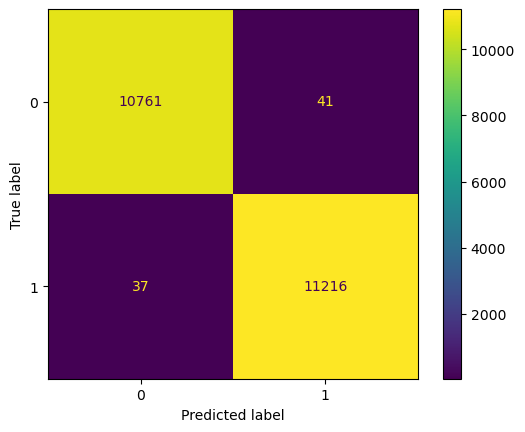

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()



In [ ]:
pipe[1].estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=317244409),
 DecisionTreeClassifier(max_features='sqrt', random_state=1096422537),
 DecisionTreeClassifier(max_features='sqrt', random_state=1241905956),
 DecisionTreeClassifier(max_features='sqrt', random_state=1349907009),
 DecisionTreeClassifier(max_features='sqrt', random_state=907075378),
 DecisionTreeClassifier(max_features='sqrt', random_state=445642472),
 DecisionTreeClassifier(max_features='sqrt', random_state=1601865613),
 DecisionTreeClassifier(max_features='sqrt', random_state=1364169720),
 DecisionTreeClassifier(max_features='sqrt', random_state=2119581268),
 DecisionTreeClassifier(max_features='sqrt', random_state=1197033814),
 DecisionTreeClassifier(max_features='sqrt', random_state=491754605),
 DecisionTreeClassifier(max_features='sqrt', random_state=2116184869),
 DecisionTreeClassifier(max_features='sqrt', random_state=1960100767),
 DecisionTreeClassifier(max_features='sqrt', random_state=1690920578),
 DecisionT

In [ ]:
XX_test = test.iloc[:,:-1]
yy_test = test.iloc[:,-1]
temp_df = XX_test
result = pipe.predict_proba(temp_df)
temp_df['win_prob'] = np.round(result.T[1]*100,1)
temp_df['result'] = yy_test

In [ ]:
temp_df

,venue,batting_team,bowling_team,over,target,runs_left,balls_left,wickets_left,crr,rrr,win_prob,result
0,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,8,231,159,72,7,9.000000,13.250000,8.0,0
1,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,2,231,228,108,8,1.500000,12.666667,6.0,0
2,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,20,231,45,5,2,9.704348,54.000000,15.0,0
3,"Himachal Pradesh Cricket Association Stadium, ...",Punjab Kings,Royal Challengers Bangalore,13,241,103,47,5,11.342466,13.148936,17.0,0
4,"Himachal Pradesh Cricket Association Stadium, ...",Punjab Kings,Royal Challengers Bangalore,10,241,130,64,7,11.892857,12.187500,13.0,0
5,"Himachal Pradesh Cricket Association Stadium, ...",Punjab Kings,Royal Challengers Bangalore,1,241,227,114,9,14.000000,11.947368,2.0,0
6,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,1,165,157,114,10,8.000000,8.263158,53.0,1
7,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,4,165,101,96,10,16.000000,6.312500,66.0,1
8,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,6,165,58,84,10,17.833333,4.142857,76.0,1
9,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Lucknow Super Giants,9,165,8,66,10,17.444444,0.727273,80.0,1
